# Imports

In [9]:
import numpy as np
import pandas as pd

from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.manifold import TSNE

from sklearn.model_selection import train_test_split

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

import tensorflow as tf

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from keras.layers import Conv1D, MaxPooling1D, Reshape, Flatten, AveragePooling1D

import matplotlib.pyplot as plt

# Upload 

In [2]:
file = pd.read_csv('energy_and_fp.csv')
Y = file['energy']
X = file.drop('energy', axis=1)

# Reduction of futures

In [3]:
def get_colors(energies):
    colors = []
    min_energy = min(energies)
    max_energy = max(energies)
    scale = 1.0 / (max_energy - min_energy)
    
    for energy in energies:
        colors.append(((max_energy - energy) * scale, 0, (energy - min_energy) * scale, 0.6))
        
    return colors

def create_scatter_plot(points, values, title):
    fig, ax = plt.subplots()
    
    colors = get_colors(values)
    
    ax.scatter(x=points[:,0], y=points[:,1], color=colors, edgecolors='none')       
    
    plt.title(title)

    plt.show()

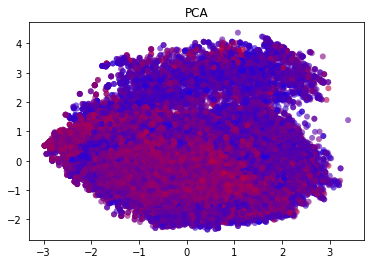

In [6]:
pca = PCA(n_components=2)
pca_X = pca.fit_transform(X, y=Y)

create_scatter_plot(pca_X, Y, 'PCA')

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


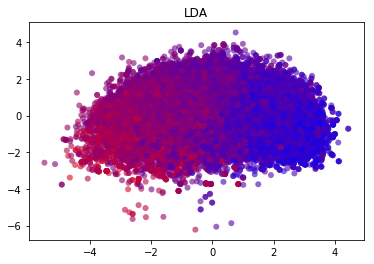

In [8]:
lda = LinearDiscriminantAnalysis(n_components=2)
lda_X = lda.fit(X, [int(item * 10) for item in Y]).transform(X)

create_scatter_plot(lda_X, Y, 'LDA')

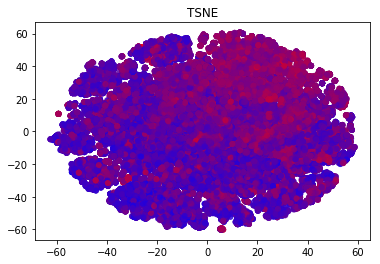

In [18]:
tsne = TSNE(n_components=2)
tsne_X = tsne.fit_transform(X, Y)

create_scatter_plot(tsne_X, Y, 'TSNE')

# Prepare data

In [4]:
X_train_val, X_test, Y_train_val, Y_test = train_test_split(X, Y, test_size=0.2, random_state=19)
X_train, X_val, Y_train, Y_val = train_test_split(X_train_val, Y_train_val, test_size=0.2, random_state=19)

In [5]:
def create_lose_plot(history_dict, title):
    loss_values = history_dict['loss']
    val_loss_values=history_dict['val_loss']
    
    plt.figure()
    plt.plot(loss_values,'bo',label='training loss')
    plt.plot(val_loss_values,'r',label='val training loss')
    plt.title(title)
    plt.legend()
    
    plt.show()
    
def get_metrics(y_train, y_train_pred, y_test, y_test_pred):
    print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(y_train, y_train_pred)))
    print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test, y_test_pred)))

    print()

    print("The mean absolute error on the Train set is:\t{:0.3f}".format(mean_absolute_error(y_train, y_train_pred)))
    print("The mean absolute error on the Test set is:\t{:0.3f}".format(mean_absolute_error(y_test, y_test_pred)))

    print()

    print("The mean squared error on the Train set is:\t{:0.3f}".format(mean_squared_error(y_train, y_train_pred)))
    print("The mean squared error on the Test set is:\t{:0.3f}".format(mean_squared_error(y_test, y_test_pred)))


# Single layer model

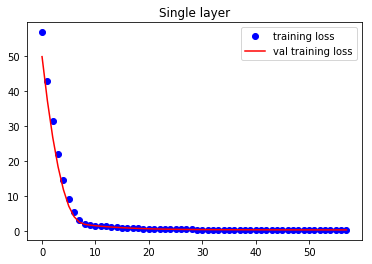

In [53]:
model = Sequential()
model.add(Dense(1, input_shape=(166,)))
    
model.compile(Adam(lr=0.00001), 'mean_squared_error')

earlystopper = EarlyStopping(monitor='val_loss', min_delta=0.001, mode='auto', restore_best_weights=True)

history = model.fit(X_train_val, 
                    Y_train_val, 
                    epochs = 420, 
                    validation_split = 0.1, 
                    shuffle = True, 
                    verbose = 0, 
                    callbacks = [earlystopper])

create_lose_plot(history.history, 'Single layer')

In [54]:
Y_train_val_pred = model.predict(X_train_val)
Y_test_pred = model.predict(X_test)

get_metrics(Y_train_val, Y_train_val_pred, Y_test, Y_test_pred)

The R2 score on the Train set is:	0.504
The R2 score on the Test set is:	0.511

The mean absolute error on the Train set is:	0.499
The mean absolute error on the Test set is:	0.493

The mean squared error on the Train set is:	0.395
The mean squared error on the Test set is:	0.389


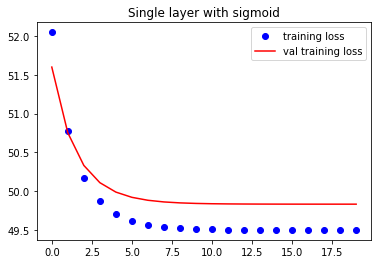

In [74]:
model = Sequential()
model.add(Dense(1, input_shape=(166,), activation = 'sigmoid'))
    
model.compile(Adam(lr=0.00001), 'mean_squared_error')

earlystopper = EarlyStopping(monitor='val_loss', min_delta=0.001, mode='auto', restore_best_weights=True, patience=5)

history = model.fit(X_train_val, 
                    Y_train_val, 
                    epochs = 420, 
                    validation_split = 0.1, 
                    shuffle = True, 
                    verbose = 0,
                    callbacks = [earlystopper])

create_lose_plot(history.history, 'Single layer with sigmoid')

In [75]:
Y_train_val_pred = model.predict(X_train_val)
Y_test_pred = model.predict(X_test)

get_metrics(Y_train_val, Y_train_val_pred, Y_test, Y_test_pred)

The R2 score on the Train set is:	-61.202
The R2 score on the Test set is:	-61.423

The mean absolute error on the Train set is:	6.981
The mean absolute error on the Test set is:	6.986

The mean squared error on the Train set is:	49.533
The mean squared error on the Test set is:	49.597


# Deep NN

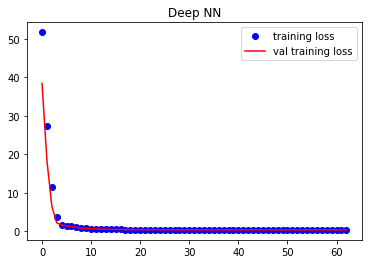

In [66]:
model = Sequential()
model.add(Dense(142, input_shape=(166,)))
model.add(Dense(120))
model.add(Dense(80))
model.add(Dense(1))
    
model.compile(Adam(lr=0.0000005), 'mean_squared_error')

earlystopper = EarlyStopping(monitor='val_loss', min_delta=0.0003, mode='auto', restore_best_weights=True)

history = model.fit(X_train_val, 
                    Y_train_val, 
                    epochs = 420, 
                    validation_split = 0.1, 
                    shuffle = True, 
                    verbose = 0, 
                    callbacks = [earlystopper])

create_lose_plot(history.history, 'Deep NN')

In [67]:
Y_train_val_pred = model.predict(X_train_val)
Y_test_pred = model.predict(X_test)

get_metrics(Y_train_val, Y_train_val_pred, Y_test, Y_test_pred)

The R2 score on the Train set is:	0.528
The R2 score on the Test set is:	0.535

The mean absolute error on the Train set is:	0.486
The mean absolute error on the Test set is:	0.480

The mean squared error on the Train set is:	0.376
The mean squared error on the Test set is:	0.370


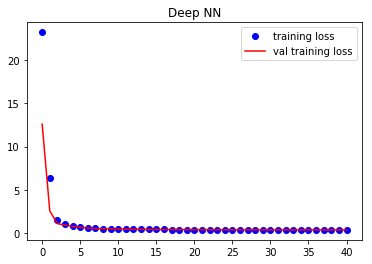

In [10]:
model = Sequential()
model.add(Dense(166, input_shape=(166,)))
model.add(Dense(166))
model.add(Dense(166))
model.add(Dense(1))
    
model.compile(Adam(lr=0.0000005), 'mean_squared_error')

earlystopper = EarlyStopping(monitor='val_loss', min_delta=0.0003, mode='auto', restore_best_weights=True)

history = model.fit(X_train_val, 
                    Y_train_val, 
                    epochs = 420, 
                    validation_split = 0.1, 
                    shuffle = True, 
                    verbose = 0, 
                    callbacks = [earlystopper])

create_lose_plot(history.history, 'Deep NN')

In [11]:
Y_train_val_pred = model.predict(X_train_val)
Y_test_pred = model.predict(X_test)

get_metrics(Y_train_val, Y_train_val_pred, Y_test, Y_test_pred)

The R2 score on the Train set is:	0.525
The R2 score on the Test set is:	0.533

The mean absolute error on the Train set is:	0.487
The mean absolute error on the Test set is:	0.481

The mean squared error on the Train set is:	0.378
The mean squared error on the Test set is:	0.371


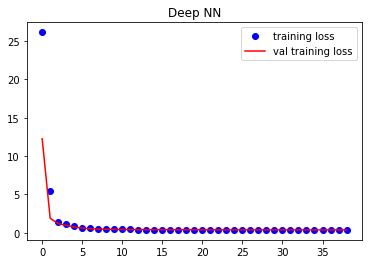

In [12]:
model = Sequential()
model.add(Dense(166, input_shape=(166,)))
model.add(Dense(166))
model.add(Dense(166))
model.add(Dense(166))
model.add(Dense(1))
    
model.compile(Adam(lr=0.0000005), 'mean_squared_error')

earlystopper = EarlyStopping(monitor='val_loss', min_delta=0.0003, mode='auto', restore_best_weights=True)

history = model.fit(X_train_val, 
                    Y_train_val, 
                    epochs = 420, 
                    validation_split = 0.1, 
                    shuffle = True, 
                    verbose = 0, 
                    callbacks = [earlystopper])

create_lose_plot(history.history, 'Deep NN')

In [13]:
Y_train_val_pred = model.predict(X_train_val)
Y_test_pred = model.predict(X_test)

get_metrics(Y_train_val, Y_train_val_pred, Y_test, Y_test_pred)

The R2 score on the Train set is:	0.525
The R2 score on the Test set is:	0.532

The mean absolute error on the Train set is:	0.487
The mean absolute error on the Test set is:	0.482

The mean squared error on the Train set is:	0.378
The mean squared error on the Test set is:	0.372


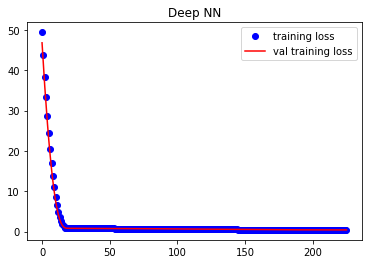

In [14]:
model = Sequential()
model.add(Dense(166, input_shape=(166,), activation='sigmoid'))
model.add(Dense(166, activation='sigmoid'))
model.add(Dense(166, activation='sigmoid'))
model.add(Dense(1))
    
model.compile(Adam(lr=0.0000005), 'mean_squared_error')

earlystopper = EarlyStopping(monitor='val_loss', min_delta=0.0003, mode='auto', restore_best_weights=True)

history = model.fit(X_train_val, 
                    Y_train_val, 
                    epochs = 420, 
                    validation_split = 0.1, 
                    shuffle = True, 
                    verbose = 0, 
                    callbacks = [earlystopper])

create_lose_plot(history.history, 'Deep NN')

In [15]:
Y_train_val_pred = model.predict(X_train_val)
Y_test_pred = model.predict(X_test)

get_metrics(Y_train_val, Y_train_val_pred, Y_test, Y_test_pred)

The R2 score on the Train set is:	0.479
The R2 score on the Test set is:	0.488

The mean absolute error on the Train set is:	0.512
The mean absolute error on the Test set is:	0.506

The mean squared error on the Train set is:	0.415
The mean squared error on the Test set is:	0.406


# Convolution NN

In [91]:
model = Sequential()
model.add(Conv1D(filters=3, kernel_size=11, input_shape=(166, 1)))
model.add(Conv1D(filters=96, kernel_size=5))
model.add(MaxPooling1D())
model.add(Conv1D(filters=256, kernel_size=3))
model.add(MaxPooling1D())
model.add(Conv1D(filters=384, kernel_size=3))
model.add(Conv1D(filters=384, kernel_size=3))
model.add(MaxPooling1D())
model.add(Flatten())
model.add(Dense(156))
model.add(Dense(156))
model.add(Dense(1))
    
model.compile(Adam(lr=0.00001), 'mean_squared_error')

earlystopper = EarlyStopping(monitor='val_loss', min_delta=0.0001, mode='auto', restore_best_weights=True, patience=2)

history = model.fit(X_train_val.values.reshape(X_train_val.shape[0], X_train_val.shape[1], 1), 
                    Y_train_val, 
                    epochs = 420, 
                    validation_split = 0.1, 
                    shuffle = True, 
                    verbose = 1, 
                    callbacks = [earlystopper])

Train on 59551 samples, validate on 6617 samples
Epoch 1/420
59551/59551 [==============================] - 431s 7ms/step - loss: 1.1525 - val_loss: 0.4375
Epoch 2/420
59551/59551 [==============================] - 430s 7ms/step - loss: 0.3979 - val_loss: 0.3747
Epoch 3/420
59551/59551 [==============================] - 430s 7ms/step - loss: 0.3551 - val_loss: 0.3838
Epoch 4/420
59551/59551 [==============================] - 431s 7ms/step - loss: 0.3348 - val_loss: 0.3361
Epoch 5/420
59551/59551 [==============================] - 430s 7ms/step - loss: 0.3202 - val_loss: 0.3182
Epoch 6/420
59551/59551 [==============================] - 430s 7ms/step - loss: 0.3093 - val_loss: 0.3072
Epoch 7/420
59551/59551 [==============================] - 433s 7ms/step - loss: 0.2994 - val_loss: 0.2971
Epoch 8/420
59551/59551 [==============================] - 431s 7ms/step - loss: 0.2911 - val_loss: 0.3025
Epoch 9/420
59551/59551 [==============================] - 432s 7ms/step - loss: 0.2854 - val_l

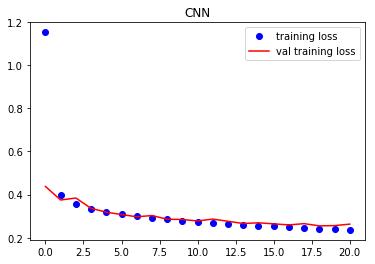

In [92]:
create_lose_plot(history.history, 'CNN')

In [94]:
Y_train_val_pred = model.predict(X_train_val.values.reshape(X_train_val.shape[0], X_train_val.shape[1], 1))
Y_test_pred = model.predict(X_test.values.reshape(X_test.shape[0], X_test.shape[1], 1))

get_metrics(Y_train_val, Y_train_val_pred, Y_test, Y_test_pred)

The R2 score on the Train set is:	0.707
The R2 score on the Test set is:	0.682

The mean absolute error on the Train set is:	0.377
The mean absolute error on the Test set is:	0.391

The mean squared error on the Train set is:	0.234
The mean squared error on the Test set is:	0.252


In [95]:
# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


Train on 59551 samples, validate on 6617 samples
Epoch 1/420
59551/59551 [==============================] - 115s 2ms/step - loss: 3.2281 - val_loss: 0.6111
Epoch 2/420
59551/59551 [==============================] - 115s 2ms/step - loss: 0.5067 - val_loss: 0.4561
Epoch 3/420
59551/59551 [==============================] - 112s 2ms/step - loss: 0.4148 - val_loss: 0.3932
Epoch 4/420
59551/59551 [==============================] - 114s 2ms/step - loss: 0.3796 - val_loss: 0.3680
Epoch 5/420
59551/59551 [==============================] - 117s 2ms/step - loss: 0.3592 - val_loss: 0.3524
Epoch 6/420
59551/59551 [==============================] - 117s 2ms/step - loss: 0.3456 - val_loss: 0.3427
Epoch 7/420
59551/59551 [==============================] - 118s 2ms/step - loss: 0.3350 - val_loss: 0.3334
Epoch 8/420
59551/59551 [==============================] - 119s 2ms/step - loss: 0.3270 - val_loss: 0.3369
Epoch 9/420
59551/59551 [==============================] - 120s 2ms/step - loss: 0.3185 - val_l

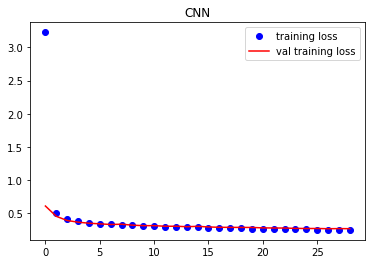

In [96]:
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=11, input_shape=(166, 1)))
model.add(MaxPooling1D())
model.add(Conv1D(filters=64, kernel_size=9))
model.add(MaxPooling1D())
model.add(Conv1D(filters=64, kernel_size=7))
model.add(MaxPooling1D())
model.add(Flatten())
model.add(Dense(156))
model.add(Dense(156))
model.add(Dense(1))
    
model.compile(Adam(lr=0.00001), 'mean_squared_error')

earlystopper = EarlyStopping(monitor='val_loss', min_delta=0.0001, mode='auto', restore_best_weights=True, patience=2)

history = model.fit(X_train_val.values.reshape(X_train_val.shape[0], X_train_val.shape[1], 1), 
                    Y_train_val, 
                    epochs = 420, 
                    validation_split = 0.1, 
                    shuffle = True, 
                    verbose = 1, 
                    callbacks = [earlystopper])

create_lose_plot(history.history, 'CNN')

In [100]:
Y_train_val_pred = model.predict(X_train_val.values.reshape(X_train_val.shape[0], X_train_val.shape[1], 1))
Y_test_pred = model.predict(X_test.values.reshape(X_test.shape[0], X_test.shape[1], 1))

get_metrics(Y_train_val, Y_train_val_pred, Y_test, Y_test_pred)

The R2 score on the Train set is:	0.684
The R2 score on the Test set is:	0.666

The mean absolute error on the Train set is:	0.391
The mean absolute error on the Test set is:	0.401

The mean squared error on the Train set is:	0.252
The mean squared error on the Test set is:	0.265


In [98]:
# serialize model to JSON
model_json = model.to_json()
with open("model1.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model1.h5")
print("Saved model to disk")

Saved model to disk


In [101]:
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=7, input_shape=(166, 1)))
model.add(MaxPooling1D())
model.add(Conv1D(filters=128, kernel_size=5))
model.add(MaxPooling1D())
model.add(Conv1D(filters=256, kernel_size=3))
model.add(MaxPooling1D())
model.add(Flatten())
model.add(Dense(120))
model.add(Dense(120))
model.add(Dense(1))
    
model.compile(Adam(lr=0.00001), 'mean_squared_error')

earlystopper = EarlyStopping(monitor='val_loss', min_delta=0.0001, mode='auto', restore_best_weights=True, patience=2)

history = model.fit(X_train_val.values.reshape(X_train_val.shape[0], X_train_val.shape[1], 1), 
                    Y_train_val, 
                    epochs = 420, 
                    validation_split = 0.1, 
                    shuffle = True, 
                    verbose = 1, 
                    callbacks = [earlystopper])

Train on 59551 samples, validate on 6617 samples
Epoch 1/420
59551/59551 [==============================] - 206s 3ms/step - loss: 1.9730 - val_loss: 0.4918
Epoch 2/420
59551/59551 [==============================] - 197s 3ms/step - loss: 0.4312 - val_loss: 0.3969
Epoch 3/420
59551/59551 [==============================] - 198s 3ms/step - loss: 0.3774 - val_loss: 0.3649
Epoch 4/420
59551/59551 [==============================] - 210s 4ms/step - loss: 0.3525 - val_loss: 0.3445
Epoch 5/420
59551/59551 [==============================] - 201s 3ms/step - loss: 0.3372 - val_loss: 0.3322
Epoch 6/420
59551/59551 [==============================] - 204s 3ms/step - loss: 0.3267 - val_loss: 0.3251
Epoch 7/420
59551/59551 [==============================] - 205s 3ms/step - loss: 0.3184 - val_loss: 0.3166
Epoch 8/420
59551/59551 [==============================] - 208s 3ms/step - loss: 0.3112 - val_loss: 0.3145
Epoch 9/420
59551/59551 [==============================] - 205s 3ms/step - loss: 0.3051 - val_l

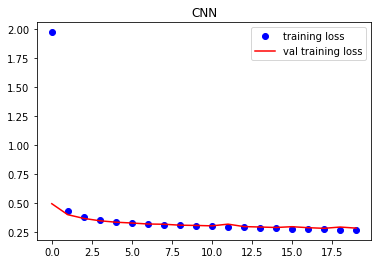

The R2 score on the Train set is:	0.667
The R2 score on the Test set is:	0.657

The mean absolute error on the Train set is:	0.402
The mean absolute error on the Test set is:	0.407

The mean squared error on the Train set is:	0.265
The mean squared error on the Test set is:	0.272


In [102]:
create_lose_plot(history.history, 'CNN')

Y_train_val_pred = model.predict(X_train_val.values.reshape(X_train_val.shape[0], X_train_val.shape[1], 1))
Y_test_pred = model.predict(X_test.values.reshape(X_test.shape[0], X_test.shape[1], 1))

get_metrics(Y_train_val, Y_train_val_pred, Y_test, Y_test_pred)

In [104]:
# serialize model to JSON
model_json = model.to_json()
with open("model2.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model2.h5")
print("Saved model to disk")

Saved model to disk


In [107]:
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, input_shape=(166, 1)))
model.add(Conv1D(filters=64, kernel_size=3))
model.add(MaxPooling1D())
model.add(Conv1D(filters=128, kernel_size=3))
model.add(Conv1D(filters=128, kernel_size=3))
model.add(MaxPooling1D())
model.add(Conv1D(filters=256, kernel_size=3))
model.add(Conv1D(filters=256, kernel_size=3))
model.add(Conv1D(filters=256, kernel_size=3))
model.add(MaxPooling1D())
model.add(Conv1D(filters=512, kernel_size=3))
model.add(Conv1D(filters=512, kernel_size=3))
model.add(Conv1D(filters=512, kernel_size=3))
model.add(MaxPooling1D())
model.add(Flatten())
model.add(Dense(120))
model.add(Dense(120))
model.add(Dense(1))
    
model.compile(Adam(lr=0.00001), 'mean_squared_error')

earlystopper = EarlyStopping(monitor='val_loss', min_delta=0.0001, mode='auto', restore_best_weights=True, patience=2)

history = model.fit(X_train_val.values.reshape(X_train_val.shape[0], X_train_val.shape[1], 1), 
                    Y_train_val, 
                    epochs = 420, 
                    validation_split = 0.1, 
                    shuffle = True, 
                    verbose = 1, 
                    callbacks = [earlystopper])

Train on 59551 samples, validate on 6617 samples
Epoch 1/420
59551/59551 [==============================] - 660s 11ms/step - loss: 1.0442 - val_loss: 0.4012
Epoch 2/420
59551/59551 [==============================] - 660s 11ms/step - loss: 0.3753 - val_loss: 0.3423
Epoch 3/420
59551/59551 [==============================] - 655s 11ms/step - loss: 0.3369 - val_loss: 0.3154
Epoch 4/420
59551/59551 [==============================] - 647s 11ms/step - loss: 0.3101 - val_loss: 0.3035
Epoch 5/420
59551/59551 [==============================] - 646s 11ms/step - loss: 0.2949 - val_loss: 0.2877
Epoch 6/420
59551/59551 [==============================] - 652s 11ms/step - loss: 0.2800 - val_loss: 0.2762
Epoch 7/420
59551/59551 [==============================] - 657s 11ms/step - loss: 0.2682 - val_loss: 0.2664
Epoch 8/420
59551/59551 [==============================] - 646s 11ms/step - loss: 0.2567 - val_loss: 0.2697
Epoch 9/420
59551/59551 [==============================] - 645s 11ms/step - loss: 0.248

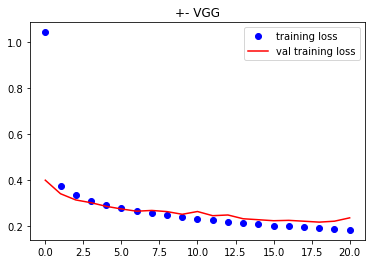

The R2 score on the Train set is:	0.774
The R2 score on the Test set is:	0.727

The mean absolute error on the Train set is:	0.325
The mean absolute error on the Test set is:	0.358

The mean squared error on the Train set is:	0.180
The mean squared error on the Test set is:	0.217


In [108]:
create_lose_plot(history.history, '+- VGG')

Y_train_val_pred = model.predict(X_train_val.values.reshape(X_train_val.shape[0], X_train_val.shape[1], 1))
Y_test_pred = model.predict(X_test.values.reshape(X_test.shape[0], X_test.shape[1], 1))

get_metrics(Y_train_val, Y_train_val_pred, Y_test, Y_test_pred)

In [109]:
# serialize model to JSON
model_json = model.to_json()
with open("model3.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model3.h5")
print("Saved model to disk")

Saved model to disk


In [110]:
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=5, input_shape=(166, 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=128, kernel_size=3))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=256, kernel_size=3))
model.add(Conv1D(filters=256, kernel_size=3))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=512, kernel_size=3))
model.add(Conv1D(filters=512, kernel_size=3))
model.add(Conv1D(filters=512, kernel_size=3))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(6))
model.add(Dense(6))
model.add(Dense(1))
    
model.compile(Adam(lr=0.00001), 'mean_squared_error')

earlystopper = EarlyStopping(monitor='val_loss', min_delta=0.0001, mode='auto', restore_best_weights=True, patience=2)

history = model.fit(X_train_val.values.reshape(X_train_val.shape[0], X_train_val.shape[1], 1), 
                    Y_train_val, 
                    epochs = 420, 
                    validation_split = 0.1, 
                    shuffle = True, 
                    verbose = 1, 
                    callbacks = [earlystopper])

Train on 59551 samples, validate on 6617 samples
Epoch 1/420
59551/59551 [==============================] - 601s 10ms/step - loss: 1.3548 - val_loss: 0.4469
Epoch 2/420
59551/59551 [==============================] - 589s 10ms/step - loss: 0.4118 - val_loss: 0.3753
Epoch 3/420
59551/59551 [==============================] - 582s 10ms/step - loss: 0.3656 - val_loss: 0.3714
Epoch 4/420
59551/59551 [==============================] - 574s 10ms/step - loss: 0.3424 - val_loss: 0.3305
Epoch 5/420
59551/59551 [==============================] - 572s 10ms/step - loss: 0.3277 - val_loss: 0.3236
Epoch 6/420
59551/59551 [==============================] - 578s 10ms/step - loss: 0.3146 - val_loss: 0.3134
Epoch 7/420
59551/59551 [==============================] - 576s 10ms/step - loss: 0.3033 - val_loss: 0.3252
Epoch 8/420
59551/59551 [==============================] - 580s 10ms/step - loss: 0.2924 - val_loss: 0.2943
Epoch 9/420
59551/59551 [==============================] - 578s 10ms/step - loss: 0.284

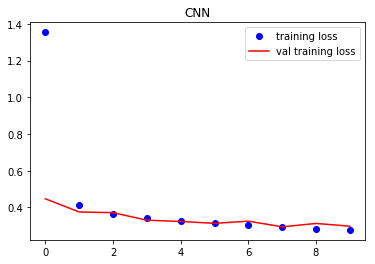

The R2 score on the Train set is:	0.647
The R2 score on the Test set is:	0.641

The mean absolute error on the Train set is:	0.414
The mean absolute error on the Test set is:	0.417

The mean squared error on the Train set is:	0.281
The mean squared error on the Test set is:	0.285


In [111]:
create_lose_plot(history.history, 'CNN')

Y_train_val_pred = model.predict(X_train_val.values.reshape(X_train_val.shape[0], X_train_val.shape[1], 1))
Y_test_pred = model.predict(X_test.values.reshape(X_test.shape[0], X_test.shape[1], 1))

get_metrics(Y_train_val, Y_train_val_pred, Y_test, Y_test_pred)

In [113]:
# serialize model to JSON
model_json = model.to_json()
with open("model4.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model4.h5")
print("Saved model to disk")

Saved model to disk


In [6]:
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, input_shape=(166, 1)))
model.add(Conv1D(filters=64, kernel_size=3))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=128, kernel_size=3))
model.add(Conv1D(filters=128, kernel_size=3))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=256, kernel_size=3))
model.add(Conv1D(filters=256, kernel_size=3))
model.add(Conv1D(filters=256, kernel_size=3))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=512, kernel_size=3))
model.add(Conv1D(filters=512, kernel_size=3))
model.add(Conv1D(filters=512, kernel_size=3))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(6))
model.add(Dense(6))
model.add(Dense(1))
    
model.compile(Adam(lr=0.00001), 'mean_squared_error')

earlystopper = EarlyStopping(monitor='val_loss', min_delta=0.00001, mode='auto', restore_best_weights=True, patience=2)

history = model.fit(X_train_val.values.reshape(X_train_val.shape[0], X_train_val.shape[1], 1), 
                    Y_train_val, 
                    epochs = 420, 
                    validation_split = 0.1, 
                    shuffle = True, 
                    verbose = 1, 
                    callbacks = [earlystopper])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train on 59551 samples, validate on 6617 samples
Epoch 1/420
59551/59551 [==============================] - 578s 10ms/step - loss: 1.2556 - val_loss: 0.4280
Epoch 2/420
59551/59551 [==============================] - 568s 10ms/step - loss: 0.3970 - val_loss: 0.3705
Epoch 3/420
59551/59551 [==============================] - 570s 10ms/step - loss: 0.3533 - val_loss: 0.3329
Epoch 4/420
59551/59551 [==============================] - 565s 9ms/step - loss: 0.3290 - val_loss: 0.3213
Epoch 5/420
59551/59551 [==============================] - 566s 10ms/step - loss: 0.3131 - val_loss: 0.3118
Epoch 6/420
59551/59551 [==============================] - 569s 10ms/step - loss: 0.2996 - val_loss: 0.3163
Epoch 7/420
59551/59551 [==============================] - 566s 10ms/step - loss: 0.2895 - val_loss: 0.2897
Epoch 8/420
59551/59551 [==============================] - 567s 10ms/step - 

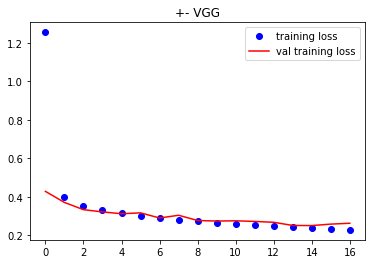

The R2 score on the Train set is:	0.716
The R2 score on the Test set is:	0.690

The mean absolute error on the Train set is:	0.369
The mean absolute error on the Test set is:	0.384

The mean squared error on the Train set is:	0.226
The mean squared error on the Test set is:	0.247


In [7]:
create_lose_plot(history.history, '+- VGG')

Y_train_val_pred = model.predict(X_train_val.values.reshape(X_train_val.shape[0], X_train_val.shape[1], 1))
Y_test_pred = model.predict(X_test.values.reshape(X_test.shape[0], X_test.shape[1], 1))

get_metrics(Y_train_val, Y_train_val_pred, Y_test, Y_test_pred)

In [8]:
# serialize model to JSON
model_json = model.to_json()
with open("model5.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model5.h5")
print("Saved model to disk")

Saved model to disk


In [10]:
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, input_shape=(166, 1)))
model.add(Conv1D(filters=64, kernel_size=3))
model.add(AveragePooling1D(pool_size=2))
model.add(Conv1D(filters=128, kernel_size=3))
model.add(Conv1D(filters=128, kernel_size=3))
model.add(AveragePooling1D(pool_size=2))
model.add(Conv1D(filters=256, kernel_size=3))
model.add(Conv1D(filters=256, kernel_size=3))
model.add(Conv1D(filters=256, kernel_size=3))
model.add(AveragePooling1D(pool_size=2))
model.add(Conv1D(filters=512, kernel_size=3))
model.add(Conv1D(filters=512, kernel_size=3))
model.add(Conv1D(filters=512, kernel_size=3))
model.add(AveragePooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(20))
model.add(Dense(20))
model.add(Dense(1))
    
model.compile(Adam(lr=0.00001), 'mean_squared_error')

earlystopper = EarlyStopping(monitor='val_loss', min_delta=0.0001, mode='auto', restore_best_weights=True, patience=2)

history = model.fit(X_train_val.values.reshape(X_train_val.shape[0], X_train_val.shape[1], 1), 
                    Y_train_val, 
                    epochs = 420, 
                    validation_split = 0.1, 
                    shuffle = True, 
                    verbose = 1, 
                    callbacks = [earlystopper])

Train on 59551 samples, validate on 6617 samples
Epoch 1/420
59551/59551 [==============================] - 566s 9ms/step - loss: 1.8481 - val_loss: 0.6998
Epoch 2/420
59551/59551 [==============================] - 558s 9ms/step - loss: 0.5332 - val_loss: 0.4667
Epoch 3/420
59551/59551 [==============================] - 554s 9ms/step - loss: 0.4635 - val_loss: 0.4368
Epoch 4/420
59551/59551 [==============================] - 554s 9ms/step - loss: 0.4393 - val_loss: 0.4151
Epoch 5/420
59551/59551 [==============================] - 555s 9ms/step - loss: 0.4224 - val_loss: 0.4051
Epoch 6/420
59551/59551 [==============================] - 556s 9ms/step - loss: 0.4114 - val_loss: 0.3937
Epoch 7/420
59551/59551 [==============================] - 557s 9ms/step - loss: 0.4051 - val_loss: 0.3936
Epoch 8/420
59551/59551 [==============================] - 560s 9ms/step - loss: 0.4004 - val_loss: 0.3933
Epoch 9/420
59551/59551 [==============================] - 558s 9ms/step - loss: 0.3979 - val_l

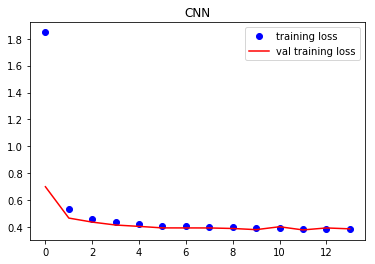

The R2 score on the Train set is:	0.521
The R2 score on the Test set is:	0.527

The mean absolute error on the Train set is:	0.487
The mean absolute error on the Test set is:	0.482

The mean squared error on the Train set is:	0.381
The mean squared error on the Test set is:	0.376


In [11]:
create_lose_plot(history.history, 'CNN')

Y_train_val_pred = model.predict(X_train_val.values.reshape(X_train_val.shape[0], X_train_val.shape[1], 1))
Y_test_pred = model.predict(X_test.values.reshape(X_test.shape[0], X_test.shape[1], 1))

get_metrics(Y_train_val, Y_train_val_pred, Y_test, Y_test_pred)

In [12]:
# serialize model to JSON
model_json = model.to_json()
with open("model6.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model6.h5")
print("Saved model to disk")

Saved model to disk
